In [1]:
import tensorflow as t
from tensorflow import keras as k
from keras import Sequential,regularizers
import matplotlib.pyplot as plt
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


In [2]:
a=t.keras.utils.image_dataset_from_directory(
    "DataSet/Training",
    labels="inferred",
    label_mode="categorical",
    image_size=(256,256),
    batch_size=32,
)
b=t.keras.utils.image_dataset_from_directory(
    "DataSet/Testing",
    labels="inferred",
    label_mode="categorical",
    image_size=(256,256),
    batch_size=32
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [3]:
def norm(i,l):
  i=t.cast(i/255,t.float32)
  return i,l

a=a.map(norm)
b=b.map(norm)

In [4]:
m=Sequential()
m.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
m.add(MaxPooling2D(2,2))
m.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
m.add(MaxPooling2D(2,2))
m.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
m.add(MaxPooling2D(2,2))
m.add(Flatten())
m.add(Dense(1024,activation="relu"))
m.add(Dense(4,activation="softmax"))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [5]:
m.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
x=m.fit(a,epochs=10)

Epoch 1/10
179/179 [==============================] - 23s 81ms/step - loss: 0.7520 - accuracy: 0.7491
Epoch 2/10
179/179 [==============================] - 14s 78ms/step - loss: 0.2449 - accuracy: 0.9084
Epoch 3/10
179/179 [==============================] - 14s 79ms/step - loss: 0.1331 - accuracy: 0.9513
Epoch 4/10
179/179 [==============================] - 14s 80ms/step - loss: 0.0756 - accuracy: 0.9737
Epoch 5/10
179/179 [==============================] - 14s 80ms/step - loss: 0.0531 - accuracy: 0.9842
Epoch 6/10
179/179 [==============================] - 14s 79ms/step - loss: 0.0269 - accuracy: 0.9916
Epoch 7/10
179/179 [==============================] - 14s 79ms/step - loss: 0.0282 - accuracy: 0.9918
Epoch 8/10
179/179 [==============================] - 14s 79ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 9/10
179/179 [==============================] - 14s 79ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 10/10
179/179 [==============================] - 14s 79ms/step - loss: 0.009

In [7]:
m.evaluate(b)

41/41 [==============================] - 2s 32ms/step - loss: 0.1846 - accuracy: 0.9626


[0.18459954857826233, 0.9626239538192749]

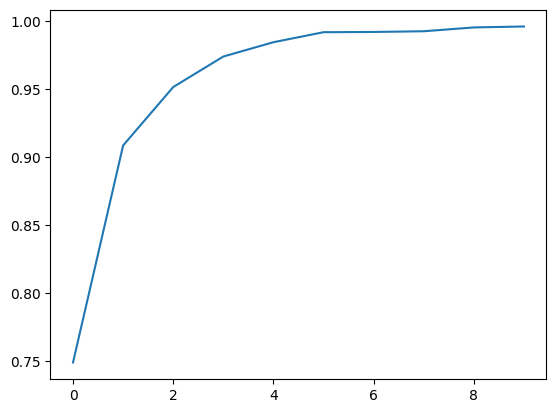

In [8]:
import matplotlib.pyplot as plt
plt.plot(x.history["accuracy"])

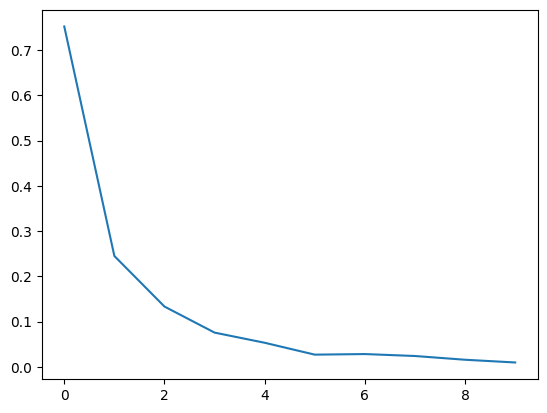

In [9]:
plt.plot(x.history["loss"])


In [10]:
predictions = m.predict(b)

41/41 [==============================] - 1s 21ms/step


41/41 [==============================] - 2s 31ms/step
Confusion Matrix:
[[ 71  66 101  62]
 [ 58  79  98  71]
 [ 95  99 117  94]
 [ 74  57  96  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24       300
           1       0.26      0.26      0.26       306
           2       0.28      0.29      0.29       405
           3       0.24      0.24      0.24       300

    accuracy                           0.26      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.26      0.26      0.26      1311



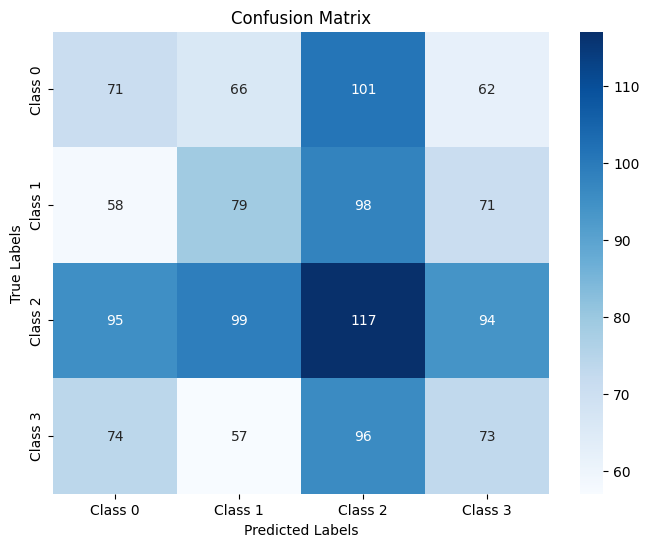

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming 'm' is your trained model

# Get predictions for the test dataset
predictions = m.predict(b)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve true labels for the test dataset
true_classes = []
for images, labels in b:
    true_classes.extend(np.argmax(labels, axis=1))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(true_classes, predicted_classes)
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
